In [3]:
from pandas import *
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def side_by_side(*objs, **kwds):
    from pandas.core.common import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)

plt.rc('figure', figsize=(10, 6))
#pandas.set_printoptions(notebook_repr_html=False)

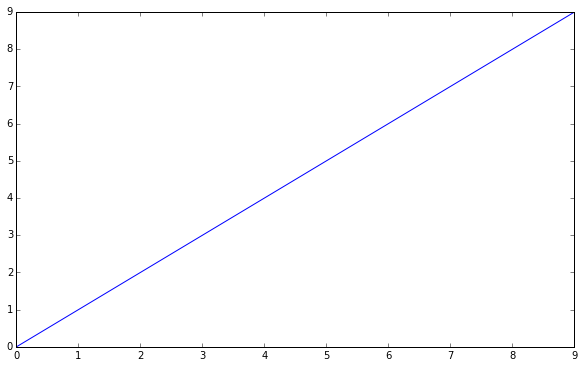

In [4]:
plt.plot(np.arange(10))

Series
======

In [7]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)
s

a   -0.322599
b   -1.564294
c   -1.996930
d   -0.652482
e   -0.700398
dtype: float64

In [8]:
'b' in s

True

In [9]:
s['b']

-1.564294056855255

In [5]:
s

In [10]:
mapping = s.to_dict()
mapping

{'a': -0.32259860848746369,
 'b': -1.564294056855255,
 'c': -1.9969304271733899,
 'd': -0.65248162777632335,
 'e': -0.70039824268144613}

In [13]:
s = Series(mapping,index=['a','b','c','e','f'])
s

a   -0.322599
b   -1.564294
c   -1.996930
e   -0.700398
f         NaN
dtype: float64

In [14]:
s.index

Index([u'a', u'b', u'c', u'e', u'f'], dtype='object')

In [15]:
isnull(s)

a    False
b    False
c    False
e    False
f     True
dtype: bool

In [16]:
s.dropna()

a   -0.322599
b   -1.564294
c   -1.996930
e   -0.700398
dtype: float64

In [19]:
s[notnull(s)]

a   -0.322599
b   -1.564294
c   -1.996930
e   -0.700398
dtype: float64

In [20]:
s*2

a   -0.645197
b   -3.128588
c   -3.993861
e   -1.400796
f         NaN
dtype: float64

In [21]:
arr = np.random.randn(5)

In [22]:
arr[:3]

array([-0.39935368, -0.82777799,  0.81071941])

In [23]:
s[:3]

a   -0.322599
b   -1.564294
c   -1.996930
dtype: float64

In [24]:
s.index

Index([u'a', u'b', u'c', u'e', u'f'], dtype='object')

In [25]:
s.dropna().index

Index([u'a', u'b', u'c', u'e'], dtype='object')

DataFrame: 2D collection of Series
==================================

In [26]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)})
df

,a,b,c
0,-1.153981,foo,1.500733
1,1.713857,bar,-0.095401
2,-0.571122,foo,-1.457772
3,0.003637,bar,0.573682
4,-0.244906,foo,-0.159506
5,0.492173,bar,-0.511965


In [31]:
df['c']

0    1.500733
1   -0.095401
2   -1.457772
3    0.573682
4   -0.159506
5   -0.511965
Name: c, dtype: float64

In [32]:
df[:3]

,a,b,c
0,-1.153981,foo,1.500733
1,1.713857,bar,-0.095401
2,-0.571122,foo,-1.457772


In [33]:
df.xs(0)

a   -1.153981
b         foo
c    1.500733
Name: 0, dtype: object

In [34]:
df.ix[0]

a   -1.153981
b         foo
c    1.500733
Name: 0, dtype: object

In [35]:
df.ix[3]

a    0.003636808
b            bar
c      0.5736824
Name: 3, dtype: object

In [36]:
df.ix[2,'b']

'foo'

In [37]:
df.ix[2:4,'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [38]:
df.ix[2:4,['b','c']]

,b,c
2,foo,-1.457772
3,bar,0.573682
4,foo,-0.159506


In [39]:
df.ix[1:3,'b':'c']

,b,c
1,bar,-0.095401
2,foo,-1.457772
3,bar,0.573682


In [40]:
df.ix[1:2,'c':'b']

""
1
2


In [41]:
df.ix[1:2,2:3]

,c
1,-0.095401
2,-1.457772


In [42]:
df.ix[[1,3],2:3]

,c
1,-0.095401
3,0.573682


In [44]:
df.ix[df['c']>0,['a','c']]

,a,c
0,-1.153981,1.500733
3,0.003637,0.573682


In [45]:
df.ix[df['a']>0,['a','b']]

,a,b
1,1.713857,bar
3,0.003637,bar
5,0.492173,bar


In [27]:
df.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [28]:
df.columns

Index([u'a', u'b', u'c'], dtype='object')

In [46]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               index=date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,0.434493,foo,-0.161227
2000-01-02,0.379317,bar,-0.832937
2000-01-03,2.160263,foo,1.204247
2000-01-04,0.666099,bar,0.333548
2000-01-05,-1.742692,foo,0.225255
2000-01-06,-0.756610,bar,-1.382202


In [47]:
df = DataFrame({'a': np.random.randn(6),
                'b': ['foo', 'bar'] * 3,
                'c': np.random.randn(6)},
               columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.720652,foo,-0.171890,NaN
1,0.850408,bar,0.011836,NaN
2,-0.101258,foo,0.610994,NaN
3,-1.316678,bar,1.354996,NaN
4,-0.696702,foo,0.217645,NaN
5,2.703286,bar,-1.208209,NaN


Creation from nested dicts
--------------------------

These arise naturally in Python code

In [49]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()
data

{'bar': {'a': 0.6095098335121413,
  'b': -1.3840999224641526,
  'c': 0.5654944825529247,
  'd': -0.5771502031115465},
 'baz': {'a': -0.7157030563803084,
  'b': 1.1781723420250974,
  'c': -2.0619924361446342,
  'd': 0.6722767491466968},
 'foo': {'a': -0.10789786184144376,
  'b': -0.6739487484787959,
  'c': -0.5306688416677744,
  'd': 0.6057921959815876}}

In [50]:
DataFrame(data)

,bar,baz,foo
a,0.609510,-0.715703,-0.107898
b,-1.384100,1.178172,-0.673949
c,0.565494,-2.061992,-0.530669
d,-0.577150,0.672277,0.605792


In [51]:
del data['foo']['c']

In [52]:
DataFrame(data)

,bar,baz,foo
a,0.609510,-0.715703,-0.107898
b,-1.384100,1.178172,-0.673949
c,0.565494,-2.061992,NaN
d,-0.577150,0.672277,0.605792


In [53]:
DataFrame(data).isnull()

,bar,baz,foo
a,False,False,False
b,False,False,False
c,False,False,True
d,False,False,False


Data alignment
==============

In [54]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [56]:
!head -10 './stock_data.csv'

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29 00:00:00,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30 00:00:00,36.43,187.0,34.39,106.15,56.99,32.7,65.8,1531.02,83.25
2007-10-31 00:00:00,36.79,189.95,34.97,108.01,57.3,33.84,65.69,1549.38,84.03
2007-11-01 00:00:00,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02 00:00:00,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05 00:00:00,35.22,186.18,34.15,105.48,56.7,33.77,64.84,1502.17,80.07
2007-11-06 00:00:00,35.84,191.79,34.14,105.27,56.8,33.47,65.49,1520.27,82.56
2007-11-07 00:00:00,34.76,186.3,33.2,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08 00:00:00,35.0,175.47,33.15,99.05,56.79,31.94,65.5,1474.77,82.0


In [55]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [57]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [58]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [60]:
(s1+s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [61]:
s1.add(s2,fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [59]:
df = close_px.ix[-10:, :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [62]:
side_by_side(s1.reindex(s2.index), s2)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [63]:
b, c  = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [66]:
b, c  = s1.align(s2, join='outer',fill_value=-1)
side_by_side(b, c)

2011-09-12     -1.00    2011-09-12    379.94
2011-09-13     -1.00    2011-09-13    384.62
2011-09-14     -1.00    2011-09-14    389.30
2011-09-15     -1.00    2011-09-15    392.96
2011-09-16     -1.00    2011-09-16    400.50
2011-09-19    411.63    2011-09-19    411.63
2011-09-20    413.45    2011-09-20    413.45
2011-09-21    412.14    2011-09-21    412.14
2011-09-22    401.82    2011-09-22    401.82
2011-09-23    404.30    2011-09-23    404.30
2011-09-26    403.17    2011-09-26    403.17
2011-09-27    399.26    2011-09-27    399.26
2011-09-28    397.01    2011-09-28    397.01
2011-09-29    390.57    2011-09-29    390.57
2011-09-30    381.32    2011-09-30    381.32
2011-10-03    374.60    2011-10-03     -1.00
2011-10-04    372.50    2011-10-04     -1.00
2011-10-05    378.25    2011-10-05     -1.00
2011-10-06    377.37    2011-10-06     -1.00
2011-10-07    369.80    2011-10-07     -1.00
2011-10-10    388.81    2011-10-10     -1.00
2011-10-11    400.29    2011-10-11     -1.00
2011-10-12

In [67]:
b, c  = s1.align(s2, join='right')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [68]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [69]:
df2 = df.ix[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [70]:
df + df2

,AAPL,IBM,MSFT
2011-10-03,NaN,346.58,49.06
2011-10-04,NaN,NaN,NaN
2011-10-05,NaN,353.70,51.78
2011-10-06,NaN,NaN,NaN
2011-10-07,NaN,364.78,52.50
2011-10-10,NaN,NaN,NaN
2011-10-11,NaN,370.00,54.00
2011-10-12,NaN,NaN,NaN
2011-10-13,NaN,373.64,54.36
2011-10-14,NaN,NaN,NaN


In [71]:
b, c = df.align(df2, join='inner')
side_by_side(b, c) 

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


Transposing: no copy if all columns are same type
-------------------------------------------------

In [72]:
df[:5].T

,2011-10-03 00:00:00,2011-10-04 00:00:00,2011-10-05 00:00:00,2011-10-06 00:00:00,2011-10-07 00:00:00
AAPL,374.60,372.50,378.25,377.37,369.80
IBM,173.29,174.74,176.85,181.69,182.39
MSFT,24.53,25.34,25.89,26.34,26.25


Columns can be any type
-----------------------

In [75]:
n = 10
foo = DataFrame(index=range(n))
foo['floats'] = np.random.randn(n)
foo['ints'] = np.arange(n)
foo['strings'] = ['foo', 'bar'] * (n / 2)
foo['bools'] = foo['floats'] > 0
foo['objects'] = date_range('1/1/2000', periods=n)
foo

,floats,ints,strings,bools,objects
0,-0.763093,0,foo,False,2000-01-01
1,0.170959,1,bar,True,2000-01-02
2,-0.470264,2,foo,False,2000-01-03
3,-0.735474,3,bar,False,2000-01-04
4,3.222453,4,foo,True,2000-01-05
5,-0.711116,5,bar,False,2000-01-06
6,-1.975117,6,foo,False,2000-01-07
7,-0.188561,7,bar,False,2000-01-08
8,-2.440695,8,foo,False,2000-01-09
9,0.740384,9,bar,True,2000-01-10


In [76]:
foo.dtypes

floats            float64
ints                int64
strings            object
bools                bool
objects    datetime64[ns]
dtype: object

N.B. transposing is not roundtrippable in this case (column-oriented data structure)

In [77]:
foo.T.T

,floats,ints,strings,bools,objects
0,-0.7630926,0,foo,False,2000-01-01 00:00:00
1,0.1709589,1,bar,True,2000-01-02 00:00:00
2,-0.4702636,2,foo,False,2000-01-03 00:00:00
3,-0.735474,3,bar,False,2000-01-04 00:00:00
4,3.222453,4,foo,True,2000-01-05 00:00:00
5,-0.7111159,5,bar,False,2000-01-06 00:00:00
6,-1.975117,6,foo,False,2000-01-07 00:00:00
7,-0.1885613,7,bar,False,2000-01-08 00:00:00
8,-2.440695,8,foo,False,2000-01-09 00:00:00
9,0.7403841,9,bar,True,2000-01-10 00:00:00


In [78]:
foo.T.T.dtypes

floats     object
ints       object
strings    object
bools      object
objects    object
dtype: object

Function application
====================

You can apply arbitrary functions to the rows or columns of a DataFrame

In [80]:
df

,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [81]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [82]:
df.mean()

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [83]:
df.apply(np.mean, axis=1)

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [84]:
df.mean(axis=1)

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

You can get as fancy as you want

In [86]:
#close_px

In [87]:
close_px.AAPL.idxmax()

Timestamp('2011-10-14 00:00:00')

In [98]:
close_px.AAPL.argmax()

Timestamp('2011-10-14 00:00:00')

In [101]:
#close_px.AAPL.index[close_px.AAPL.argmax()]

In [102]:
def peak_date(series):
    return series.argmax()
close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [103]:
def peak_date2(series):
    return series.idxmax()
close_px.apply(peak_date2)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [104]:
df.apply(lambda x: x.max() - x.min()) # np.ptp

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [107]:
np.log(close_px.head())

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019


Plotting
========

Some basic plotting integration with matplotlib in Series / DataFrame

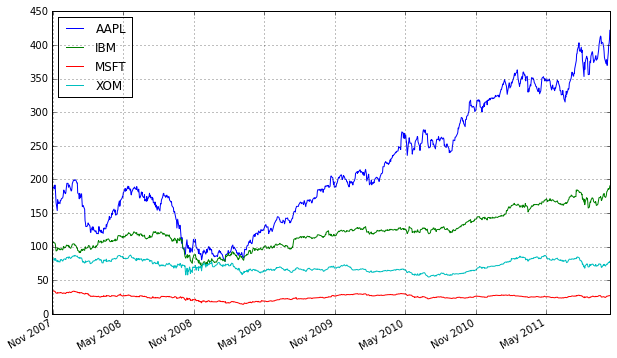

In [110]:
close_px[['AAPL', 'IBM', 'MSFT', 'XOM']].plot()

In [113]:
close_px.ix[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00, dtype: float64

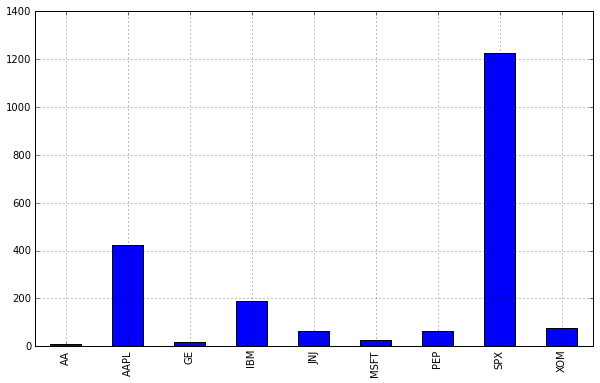

In [112]:
close_px.ix[-1].plot(kind='bar')

In [114]:
#rets.ix[-1]

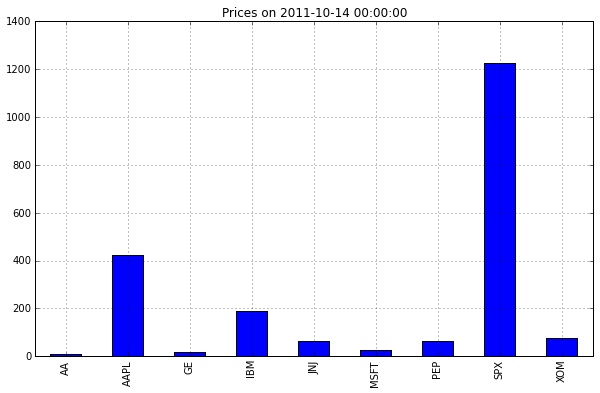

In [120]:
close_px.ix[-1].plot(kind='bar')
plt.title('Prices on %s' % close_px.index[-1])
plt.axhline(0)

Hierarchical indexing
---------------------

In [121]:
index = MultiIndex(levels=[['foo', 'bar', 'baz', 'qux'],
                                   ['one', 'two', 'three']],
                           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
                                   [0, 1, 2, 0, 1, 1, 2, 0, 1, 2]])
hdf = DataFrame(np.random.randn(10, 3), index=index,
                columns=['A', 'B', 'C'])
hdf

A         B         C
foo one   -0.180296 -1.625128  1.378520
    two   -1.629207  0.946709  1.076992
    three -0.173688 -0.925345 -0.304356
bar one   -0.671626  0.125412 -1.441072
    two    0.556779  0.393297 -0.943879
baz two    0.649333  0.525667  0.698706
    three  1.141328 -0.345052 -1.047393
qux one   -1.380764 -1.568901  0.331543
    two   -0.581001  0.900349 -0.529470
    three  1.300181 -0.624830  0.425443

In [122]:
hdf.ix['foo']

,A,B,C
one,-0.180296,-1.625128,1.378520
two,-1.629207,0.946709,1.076992
three,-0.173688,-0.925345,-0.304356


In [123]:
hdf.ix['foo'] = 0
hdf

A         B         C
foo one    0.000000  0.000000  0.000000
    two    0.000000  0.000000  0.000000
    three  0.000000  0.000000  0.000000
bar one   -0.671626  0.125412 -1.441072
    two    0.556779  0.393297 -0.943879
baz two    0.649333  0.525667  0.698706
    three  1.141328 -0.345052 -1.047393
qux one   -1.380764 -1.568901  0.331543
    two   -0.581001  0.900349 -0.529470
    three  1.300181 -0.624830  0.425443

In [129]:
hdf.ix[('bar', 'two'),'A']

0.55677895592169868

Stacking and unstacking
-----------------------

In [48]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [49]:
df2 = df.ix[[0, 1, 2, 4, 5, 7]]
df2

In [50]:
df.unstack()['B']

GroupBy
=======

In [51]:
df = DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                'B' : ['one', 'one', 'two', 'three',
                       'two', 'two', 'one', 'three'],
                'C' : np.random.randn(8),
                'D' : np.random.randn(8)})
df

In [52]:
for key, group in df.groupby('A'):
    print key
    print group

In [53]:
df.groupby('A')['C'].describe().T

In [54]:
df.groupby('A').mean()

In [55]:
for key, group in df.groupby('A'):
    print key
    print group

In [56]:
df.groupby(['A', 'B']).mean()

In [57]:
df.groupby(['A', 'B'], as_index=False).mean()

GroupBy example: linear regression by group
-------------------------------------------

In [58]:
import scikits.statsmodels.api as sm
rets = close_px / close_px.shift(1) - 1

def get_beta(rets):
    rets = rets.dropna()
    rets['intercept'] = 1.
    model = sm.OLS(rets['MSFT'], rets.ix[:, ['AAPL', 'intercept']]).fit()
    return model.params

get_beta(rets)

In [59]:
grouped = rets.groupby([lambda x: x.year, lambda x: x.month])
beta_by_ym = grouped.apply(get_beta)
beta_by_ym

In [60]:
beta_by_ym.unstack(0)['AAPL']

GroupBy with hierarchical indexing
----------------------------------

In [61]:
tuples = zip(*[['bar', 'bar', 'baz', 'baz',
                'foo', 'foo', 'qux', 'qux'],
               ['one', 'two', 'one', 'two',
                'one', 'two', 'one', 'two']])
index = MultiIndex.from_tuples(tuples)
columns = MultiIndex.from_tuples([('A', 'cat'), ('B', 'dog'),
                                  ('B', 'cat'), ('A', 'dog')])
df = DataFrame(randn(8, 4), index=index, columns=columns)
df

In [62]:
df.groupby(level=0, axis=0).mean()

In [63]:
df.stack()

In [64]:
df.stack().mean(1).unstack()

In [65]:
# could also have done
df.groupby(level=1, axis=1).mean()